<a href="https://colab.research.google.com/github/pande1sachin/Navigating-the-Data-Science-Job-Landscape-Web-Scraping-Using-Python-/blob/main/Sachin_Pande_Assignment_%7C_Numerical_Programming_in_Python_Analyze_it_Yourself.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement: Navigating the Data Science Job Landscape**

🚀 Unleash your creativity in crafting a solution that taps into the heartbeat of the data science job market! Envision an ingenious project that seamlessly wields cutting-edge web scraping techniques and illuminating data analysis.

🔍 Your mission? To engineer a tool that effortlessly gathers job listings from a multitude of online sources, extracting pivotal nuggets such as job descriptions, qualifications, locations, and salaries.

🧩 However, the true puzzle lies in deciphering this trove of data. Can your solution discern patterns that spotlight the most coveted skills? Are there threads connecting job types to compensation packages? How might it predict shifts in industry demand?

🎯 The core objectives of this challenge are as follows:

1. Web Scraping Mastery: Forge an adaptable and potent web scraping mechanism. Your creation should adeptly harvest data science job postings from a diverse array of online platforms. Be ready to navigate evolving website structures and process hefty data loads.

2. Data Symphony: Skillfully distill vital insights from the harvested job listings. Extract and cleanse critical information like job titles, company names, descriptions, qualifications, salaries, locations, and deadlines. Think data refinement and organization.

3. Market Wizardry: Conjure up analytical tools that conjure meaningful revelations from the gathered data. Dive into the abyss of job demand trends, geographic distribution, salary variations tied to experience and location, favored qualifications, and emerging skill demands.

4. Visual Magic: Weave a tapestry of visualization magic. Design captivating charts, graphs, and visual representations that paint a crystal-clear picture of the analyzed data. Make these visuals the compass that guides users through job market intricacies.

🌐 While the web scraping universe is yours to explore, consider these platforms as potential stomping grounds:

* LinkedIn Jobs
* Indeed
* Naukri
* Glassdoor
* AngelList

🎈 Your solution should not only decode the data science job realm but also empower professionals, job seekers, and recruiters to harness the dynamic shifts of the industry. The path is open, the challenge beckons – are you ready to embark on this exciting journey?






In [ ]:
# Required libraries are installed
!pip install beautifulsoup4
!pip install requests

In [ ]:
# All libraries and modules required are imported
from bs4 import BeautifulSoup
import requests
import pandas as pd
import requests
from numpy import NaN
import matplotlib.pyplot as plt
import seaborn as sns

####* Web Scraping Mastery: Forge an adaptable and potent web scraping mechanism. Your creation should adeptly harvest data science job postings from a diverse array of online platforms. Be ready to navigate evolving website structures and process hefty data loads.

In [ ]:
# Empty dictionary to store scraped data in proper structure so that it can then be converted into a dataframe
job_details_dict= {'job_title': [], 'company_name': [], 'experience': [], 'location': [], 'salary': [], 'job_description': [], 'key_skills': [], 'walk_in_details': []}

pages_to_scrape= 10 # This decides the number of pages to be scraped
for page in range(1, pages_to_scrape + 1):  # Runs the web scraping and data extracting script for 10 pages

  # Link of the page from which the required dta is scraped
  url = f"https://www.timesjobs.com/candidate/job-search.html?from=submit&luceneResultSize=25&txtKeywords=data%20science&postWeek=60&searchType=personalizedSearch&actualTxtKeywords=Data%20Science&searchName=recentSearches&searchBy=0&rdoOperator=OR&pDate=I&sequence={page}&startPage=1"

  # This imitates just like a web browser so that the website's server get a signal that
  # the data to be scraped is requested is from a browser
  headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Trident/7.0; rv:11.0) like Gecko'}
  response= requests.get(url, headers=headers)  # Sends a get request to the websites server and extracts all required data
  html_content = response.text  # Assigns text data from the above variable to html_content variable
  soup = BeautifulSoup(html_content, "html.parser") # Analyse and assigns html content from above variable
  ul_tag= soup.find('ul', {'class': 'new-joblist'}) # finds "ul" element with specefic class an assigns its content to the variable
  # finds all "li" element with specefic class an assigns its content to the variable
  li_tag= soup.find_all('li', {'class': 'clearfix job-bx wht-shd-bx'})

  for li_items in li_tag: # Iterates over content of 'li_tag' variable

    job_title= li_items.h2.text.strip()
    job_details_dict['job_title'].append(job_title)

    co_name= li_items.h3.text.strip().split('(')[0].strip()
    job_details_dict['company_name'].append(co_name)

    ul_tags1 = li_items.find('ul', class_='top-jd-dtl clearfix')
    li_tags1 = ul_tags1.find_all('li')

    if len(li_tags1) >= 3:
            experience = li_tags1[0].text.strip().split('_travel')[1].strip()
            job_details_dict['experience'].append(experience)

            salary = li_tags1[1].text.strip()
            job_details_dict['salary'].append(salary)

            location = li_tags1[2].text.strip().split('_on')[1].strip()
            job_details_dict['location'].append(location)
    elif len(li_tags1) == 2:
            experience = li_tags1[0].text.strip().split('_travel')[1].strip()
            job_details_dict['experience'].append(experience)

            salary = 'Not mentioned'
            job_details_dict['salary'].append(salary)

            location = li_tags1[1].text.strip().split('_on')[1].strip()
            job_details_dict['location'].append(location)
    else:
            experience = 'Not mentioned'
            job_details_dict['experience'].append(experience)

            salary = 'Not mentioned'
            job_details_dict['salary'].append(salary)

            location = 'Not mentioned'
            job_details_dict['location'].append(location)

    ul_tags2 = li_items.find('ul', class_='list-job-dtl clearfix')
    li_tags2 = ul_tags2.find_all('li')

    if len(li_tags2) >= 3:
            job_description = li_tags2[0].text.strip().split('Job Description:')[1].strip()
            job_details_dict['job_description'].append(job_description)

            key_skill = li_tags2[1].text.strip().split('Skills:')[1].strip()
            job_details_dict['key_skills'].append(key_skill)

            walk_in_details = li_tags2[2].text.strip().split('Walk-in Details ')[1].strip()
            job_details_dict['walk_in_details'].append(walk_in_details)
    elif len(li_tags2) == 2:
            job_description = li_tags2[0].text.strip().split('Job Description:')[1].strip()
            job_details_dict['job_description'].append(job_description)

            key_skill = li_tags2[1].text.strip().split('Skills:')[1].strip()
            job_details_dict['key_skills'].append(key_skill)

            walk_in_details = 'Not mentioned'
            job_details_dict['walk_in_details'].append(walk_in_details)
    else:
            job_description = 'Not mentioned'
            job_details_dict['job_description'].append(job_description)

            key_skill = 'Not mentioned'
            job_details_dict['key_skills'].append(key_skill)

            walk_in_details = 'Not mentioned'
            job_details_dict['walk_in_details'].append(walk_in_details)

#### * Data Symphony: Skillfully distill vital insights from the harvested job listings. Extract and cleanse critical information like job titles, company names, descriptions, qualifications, salaries, locations, and deadlines. Think data refinement and organization.

In [ ]:
jobs_df= pd.DataFrame(job_details_dict)
jobs_df

,job_title,company_name,experience,location,salary,job_description,key_skills,walk_in_details
0,Offline trainer - Data Science,NARESH I TECHNOLOGIES,5 - 10 yrs,Hyderabad/Secunderabad,₹Rs 5.00 - 10.00 Lacs p.a.,We are looking for Full Stack Data ScienceTrai...,"Data Science , Artificial Intelligence , N...",Not mentioned
1,Data Science Internship in Pune,Maxgen Technologies,0 - 1 yrs,"Pune, Jalgaon, Kolhapur, Nagpur, Solapur",₹Rs 1.00 - 2.00 Lacs p.a.,Maxgen Technologies pvt ltd offering a live pr...,.,02-Nov-2023 - 01-Jan-2024 10:30 AM - 04:00 PM...
2,Data Science Internship in Mumbai,Maxgen Technologies,0 - 1 yrs,"Mumbai, Kalyan, Nasik, Navi Mumbai, Thane",Not mentioned,Maxgen Technologies pvt ltd offering internshi...,.,02-Nov-2023 - 01-Jan-2024 10:00 AM - 04:00 PM...
3,Data Science Trainer,NARESH I TECHNOLOGIES,5 - 10 yrs,Hyderabad/Secunderabad,₹Rs 3.00 - 10.00 Lacs p.a.,We are looking for Full Stack Data ScienceTrai...,"Python , R Programming , machine Learning ...",Not mentioned
4,Data Science,Electrobrain modern technologies pvt ltd,3 - 8 yrs,"Ahmedabad, Bengaluru / Bangalore, Chennai, ...",₹Rs 3.15 - 5.65 Lacs p.a.,Strong programming skills in Python Sound kno...,"Healthcare , Python , Provider , US Heal...",Not mentioned
...,...,...,...,...,...,...,...,...
245,Are you Interested to work form your home?,MSNU Recruiters,2 - 5 yrs,"Guntakal, Guntur, Kakinada",₹Rs 3.20 - 6.20 Lacs p.a.,"Searching of , offline oline jobs , home bas...","data entry operator , operator , executive...",Not mentioned
246,Urgently required back office executive only 2...,MSNU Recruiters,1 - 4 yrs,"Delhi, Delhi/NCR, Gurgaon",₹Rs 2.20 - 4.20 Lacs p.a.,Looking freelancer for back office8 vacancies ...,"COMPUTER OPERATOR , data entry operator , ...",Not mentioned
247,job simple typing work at your home,MSNU Recruiters,1 - 4 yrs,"Anantapur, Chittoor, Itanagar, Guwahati",₹Rs 3.50 - 4.50 Lacs p.a.,"*Deal all home workers , *No target , no tens...","MIS EXECUTIVE , backend executive , comput...",Not mentioned
248,Company Hiring Candidates For Part Time job,MSNU Recruiters,2 - 5 yrs,"Hosur, Ooty, Salem, Vellore",₹Rs 3.10 - 4.15 Lacs p.a.,"We are into yours friendly , neighborhood , ...","COMPUTER OPERATOR , office assistant , dat...",Not mentioned


#### * Market Wizardry: Conjure up analytical tools that conjure meaningful revelations from the gathered data. Dive into the abyss of job demand trends, geographic distribution, salary variations tied to experience and location, favored qualifications, and emerging skill demands.


In [ ]:
#If you want to restart from dataframe part start executing from here
jobs_df_copy= jobs_df.copy()
jobs_df_copy.head()

,job_title,company_name,experience,location,salary,job_description,key_skills,walk_in_details
0,Offline trainer - Data Science,NARESH I TECHNOLOGIES,5 - 10 yrs,Hyderabad/Secunderabad,₹Rs 5.00 - 10.00 Lacs p.a.,We are looking for Full Stack Data ScienceTrai...,"Data Science , Artificial Intelligence , N...",Not mentioned
1,Data Science Internship in Pune,Maxgen Technologies,0 - 1 yrs,"Pune, Jalgaon, Kolhapur, Nagpur, Solapur",₹Rs 1.00 - 2.00 Lacs p.a.,Maxgen Technologies pvt ltd offering a live pr...,.,02-Nov-2023 - 01-Jan-2024 10:30 AM - 04:00 PM...
2,Data Science Internship in Mumbai,Maxgen Technologies,0 - 1 yrs,"Mumbai, Kalyan, Nasik, Navi Mumbai, Thane",Not mentioned,Maxgen Technologies pvt ltd offering internshi...,.,02-Nov-2023 - 01-Jan-2024 10:00 AM - 04:00 PM...
3,Data Science Trainer,NARESH I TECHNOLOGIES,5 - 10 yrs,Hyderabad/Secunderabad,₹Rs 3.00 - 10.00 Lacs p.a.,We are looking for Full Stack Data ScienceTrai...,"Python , R Programming , machine Learning ...",Not mentioned
4,Data Science,Electrobrain modern technologies pvt ltd,3 - 8 yrs,"Ahmedabad, Bengaluru / Bangalore, Chennai, ...",₹Rs 3.15 - 5.65 Lacs p.a.,Strong programming skills in Python Sound kno...,"Healthcare , Python , Provider , US Heal...",Not mentioned


In [ ]:
jobs_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   job_title        250 non-null    object
 1   company_name     250 non-null    object
 2   experience       250 non-null    object
 3   location         250 non-null    object
 4   salary           250 non-null    object
 5   job_description  250 non-null    object
 6   key_skills       250 non-null    object
 7   walk_in_details  250 non-null    object
dtypes: object(8)
memory usage: 15.8+ KB


In [ ]:
exp_lst = jobs_df_copy.experience
min_exp_lst= []
max_exp_lst= []

for exp in exp_lst:
  expr_lst= exp.split(' ')

  min_exp_int= int(expr_lst[0])
  min_exp_lst.append(min_exp_int)

  max_exp_int= int(expr_lst[2])
  max_exp_lst.append(max_exp_int)


jobs_df_copy.insert(3, 'min_exp', min_exp_lst, allow_duplicates=False)
jobs_df_copy.insert(4, 'max_exp', max_exp_lst, allow_duplicates=False)

jobs_df_copy.head()

,job_title,company_name,experience,min_exp,max_exp,location,salary,job_description,key_skills,walk_in_details
0,Offline trainer - Data Science,NARESH I TECHNOLOGIES,5 - 10 yrs,5,10,Hyderabad/Secunderabad,₹Rs 5.00 - 10.00 Lacs p.a.,We are looking for Full Stack Data ScienceTrai...,"Data Science , Artificial Intelligence , N...",Not mentioned
1,Data Science Internship in Pune,Maxgen Technologies,0 - 1 yrs,0,1,"Pune, Jalgaon, Kolhapur, Nagpur, Solapur",₹Rs 1.00 - 2.00 Lacs p.a.,Maxgen Technologies pvt ltd offering a live pr...,.,02-Nov-2023 - 01-Jan-2024 10:30 AM - 04:00 PM...
2,Data Science Internship in Mumbai,Maxgen Technologies,0 - 1 yrs,0,1,"Mumbai, Kalyan, Nasik, Navi Mumbai, Thane",Not mentioned,Maxgen Technologies pvt ltd offering internshi...,.,02-Nov-2023 - 01-Jan-2024 10:00 AM - 04:00 PM...
3,Data Science Trainer,NARESH I TECHNOLOGIES,5 - 10 yrs,5,10,Hyderabad/Secunderabad,₹Rs 3.00 - 10.00 Lacs p.a.,We are looking for Full Stack Data ScienceTrai...,"Python , R Programming , machine Learning ...",Not mentioned
4,Data Science,Electrobrain modern technologies pvt ltd,3 - 8 yrs,3,8,"Ahmedabad, Bengaluru / Bangalore, Chennai, ...",₹Rs 3.15 - 5.65 Lacs p.a.,Strong programming skills in Python Sound kno...,"Healthcare , Python , Provider , US Heal...",Not mentioned


In [ ]:
salary_lst = jobs_df_copy.salary
min_sal_lst= []
max_sal_lst= []

for salary in salary_lst:
  sal_lst= salary.split(' ')
  if len(sal_lst) >= 6:
    min_sal_int= float(sal_lst[1])
    min_sal_lst.append(min_sal_int)

    max_sal_int= float(sal_lst[3])
    max_sal_lst.append(max_sal_int)
  else:
    min_sal_lst.append(NaN)
    max_sal_lst.append(NaN)
jobs_df_copy.insert(7, 'min_salary', min_sal_lst, allow_duplicates=False)
jobs_df_copy.insert(8, 'max_salary', max_sal_lst, allow_duplicates=False)

jobs_df_copy.head()

,job_title,company_name,experience,min_exp,max_exp,location,salary,min_salary,max_salary,job_description,key_skills,walk_in_details
0,Offline trainer - Data Science,NARESH I TECHNOLOGIES,5 - 10 yrs,5,10,Hyderabad/Secunderabad,₹Rs 5.00 - 10.00 Lacs p.a.,5.00,10.00,We are looking for Full Stack Data ScienceTrai...,"Data Science , Artificial Intelligence , N...",Not mentioned
1,Data Science Internship in Pune,Maxgen Technologies,0 - 1 yrs,0,1,"Pune, Jalgaon, Kolhapur, Nagpur, Solapur",₹Rs 1.00 - 2.00 Lacs p.a.,1.00,2.00,Maxgen Technologies pvt ltd offering a live pr...,.,02-Nov-2023 - 01-Jan-2024 10:30 AM - 04:00 PM...
2,Data Science Internship in Mumbai,Maxgen Technologies,0 - 1 yrs,0,1,"Mumbai, Kalyan, Nasik, Navi Mumbai, Thane",Not mentioned,NaN,NaN,Maxgen Technologies pvt ltd offering internshi...,.,02-Nov-2023 - 01-Jan-2024 10:00 AM - 04:00 PM...
3,Data Science Trainer,NARESH I TECHNOLOGIES,5 - 10 yrs,5,10,Hyderabad/Secunderabad,₹Rs 3.00 - 10.00 Lacs p.a.,3.00,10.00,We are looking for Full Stack Data ScienceTrai...,"Python , R Programming , machine Learning ...",Not mentioned
4,Data Science,Electrobrain modern technologies pvt ltd,3 - 8 yrs,3,8,"Ahmedabad, Bengaluru / Bangalore, Chennai, ...",₹Rs 3.15 - 5.65 Lacs p.a.,3.15,5.65,Strong programming skills in Python Sound kno...,"Healthcare , Python , Provider , US Heal...",Not mentioned


In [ ]:
jobs_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   job_title        250 non-null    object 
 1   company_name     250 non-null    object 
 2   experience       250 non-null    object 
 3   min_exp          250 non-null    int64  
 4   max_exp          250 non-null    int64  
 5   location         250 non-null    object 
 6   salary           250 non-null    object 
 7   min_salary       150 non-null    float64
 8   max_salary       150 non-null    float64
 9   job_description  250 non-null    object 
 10  key_skills       250 non-null    object 
 11  walk_in_details  250 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 23.6+ KB


In [ ]:
jobs_df_copy['walk_in_details'].replace('Not mentioned', NaN, inplace= True)
jobs_df_copy.head()

,job_title,company_name,experience,min_exp,max_exp,location,salary,min_salary,max_salary,job_description,key_skills,walk_in_details
0,Offline trainer - Data Science,NARESH I TECHNOLOGIES,5 - 10 yrs,5,10,Hyderabad/Secunderabad,₹Rs 5.00 - 10.00 Lacs p.a.,5.00,10.00,We are looking for Full Stack Data ScienceTrai...,"Data Science , Artificial Intelligence , N...",NaN
1,Data Science Internship in Pune,Maxgen Technologies,0 - 1 yrs,0,1,"Pune, Jalgaon, Kolhapur, Nagpur, Solapur",₹Rs 1.00 - 2.00 Lacs p.a.,1.00,2.00,Maxgen Technologies pvt ltd offering a live pr...,.,02-Nov-2023 - 01-Jan-2024 10:30 AM - 04:00 PM...
2,Data Science Internship in Mumbai,Maxgen Technologies,0 - 1 yrs,0,1,"Mumbai, Kalyan, Nasik, Navi Mumbai, Thane",Not mentioned,NaN,NaN,Maxgen Technologies pvt ltd offering internshi...,.,02-Nov-2023 - 01-Jan-2024 10:00 AM - 04:00 PM...
3,Data Science Trainer,NARESH I TECHNOLOGIES,5 - 10 yrs,5,10,Hyderabad/Secunderabad,₹Rs 3.00 - 10.00 Lacs p.a.,3.00,10.00,We are looking for Full Stack Data ScienceTrai...,"Python , R Programming , machine Learning ...",NaN
4,Data Science,Electrobrain modern technologies pvt ltd,3 - 8 yrs,3,8,"Ahmedabad, Bengaluru / Bangalore, Chennai, ...",₹Rs 3.15 - 5.65 Lacs p.a.,3.15,5.65,Strong programming skills in Python Sound kno...,"Healthcare , Python , Provider , US Heal...",NaN


In [ ]:
jobs_df_copy.isnull().sum()

job_title            0
company_name         0
experience           0
min_exp              0
max_exp              0
location             0
salary               0
min_salary         100
max_salary         100
job_description      0
key_skills           0
walk_in_details    216
dtype: int64

In [ ]:
jobs_df_copy.describe().round(2)

,min_exp,max_exp,min_salary,max_salary
count,250.00,250.00,150.00,150.00
mean,2.42,5.40,3.92,7.27
std,2.84,3.62,7.66,12.86
min,0.00,1.00,1.00,1.65
25%,0.00,3.00,1.95,3.81
50%,2.00,5.00,2.90,5.38
75%,3.00,7.75,3.20,6.35
max,20.00,23.00,50.00,95.00


#### * From above analysis it can be said that average minimum and maximum experience required is around '2 yrs 6 months' and '5 yrs 6 months' respectively, whereas the average minimum and maximum salary is around '4 lacs' and '7 lac 30 thousand' per annum respectively.

#Data Visualization

#### * Visual Magic: Weave a tapestry of visualization magic. Design captivating charts, graphs, and visual representations that paint a crystal-clear picture of the analyzed data. Make these visuals the compass that guides users through job market intricacies.

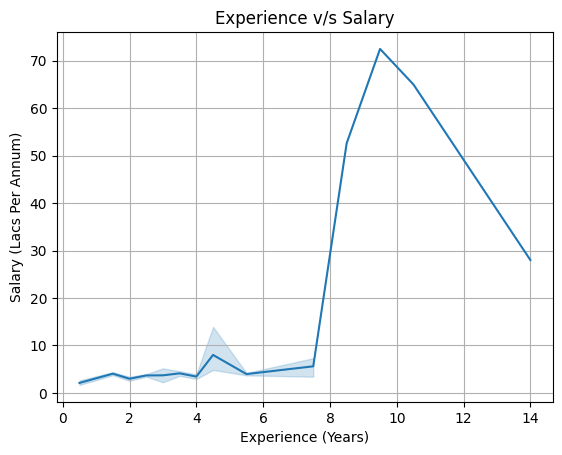

In [ ]:
# Exerience v/s Salary

sns.lineplot(data= jobs_df_copy, x= jobs_df_copy[['max_exp', 'min_exp']].mean(axis= 1), y= jobs_df_copy[['max_salary', 'min_salary']].mean(axis= 1))
plt.xlabel('Experience (Years)')
plt.ylabel('Salary (Lacs Per Annum)')
plt.title('Experience v/s Salary')
plt.grid(True)
plt.show()

##### From the above chart it is visible that there is a positive relation between Experiencs and Salary i.e. with an increase in experience salary increases.

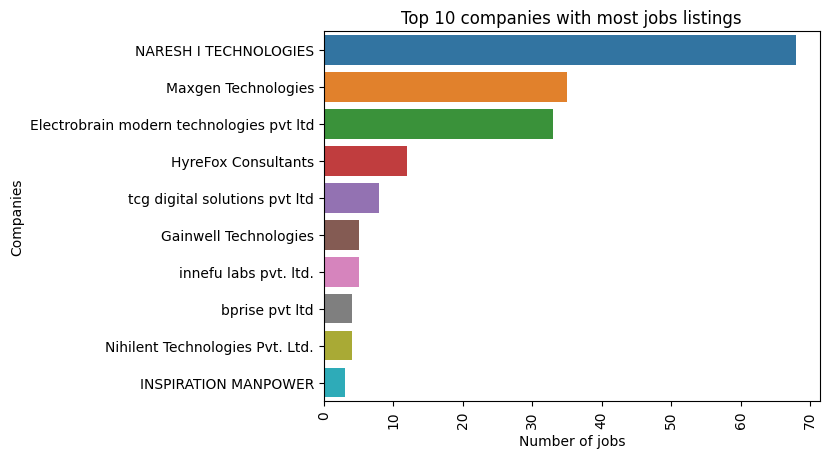

In [ ]:
# Distribution of jobs w.r.t. companies
count_companies= jobs_df_copy.company_name.value_counts()
companies_names= jobs_df_copy.company_name.unique()
# x_labels = [label[:25] for label in companies_names]

ref_df= pd.DataFrame({"companies_names": count_companies, 'no_of_jobs': companies_names})
bar_plt_df= ref_df.head(10)

sns.barplot(x= bar_plt_df.companies_names, y= bar_plt_df.no_of_jobs)
plt.xlabel('Number of jobs')
plt.ylabel('Companies')
plt.xticks(rotation=90)
plt.title('Top 10 companies with most jobs listings')
plt.show()

#### * Bar chart above gives us insight about the companies with most job postings.

In [ ]:
# extract indivisual city names from location column

jobs_df_copy['cities'] = jobs_df_copy['location'].str.split(',')

# Create a new DataFrame by exploding the "Cities" column into rows
cities_df = jobs_df_copy.explode('cities')

In [ ]:
cities_df.head()

,job_title,company_name,experience,min_exp,max_exp,location,salary,min_salary,max_salary,job_description,key_skills,walk_in_details,cities
0,Offline trainer - Data Science,NARESH I TECHNOLOGIES,5 - 10 yrs,5,10,Hyderabad/Secunderabad,₹Rs 5.00 - 10.00 Lacs p.a.,5.0,10.0,We are looking for Full Stack Data ScienceTrai...,"Data Science , Artificial Intelligence , N...",NaN,Hyderabad/Secunderabad
1,Data Science Internship in Pune,Maxgen Technologies,0 - 1 yrs,0,1,"Pune, Jalgaon, Kolhapur, Nagpur, Solapur",₹Rs 1.00 - 2.00 Lacs p.a.,1.0,2.0,Maxgen Technologies pvt ltd offering a live pr...,.,02-Nov-2023 - 01-Jan-2024 10:30 AM - 04:00 PM...,Pune
1,Data Science Internship in Pune,Maxgen Technologies,0 - 1 yrs,0,1,"Pune, Jalgaon, Kolhapur, Nagpur, Solapur",₹Rs 1.00 - 2.00 Lacs p.a.,1.0,2.0,Maxgen Technologies pvt ltd offering a live pr...,.,02-Nov-2023 - 01-Jan-2024 10:30 AM - 04:00 PM...,Jalgaon
1,Data Science Internship in Pune,Maxgen Technologies,0 - 1 yrs,0,1,"Pune, Jalgaon, Kolhapur, Nagpur, Solapur",₹Rs 1.00 - 2.00 Lacs p.a.,1.0,2.0,Maxgen Technologies pvt ltd offering a live pr...,.,02-Nov-2023 - 01-Jan-2024 10:30 AM - 04:00 PM...,Kolhapur
1,Data Science Internship in Pune,Maxgen Technologies,0 - 1 yrs,0,1,"Pune, Jalgaon, Kolhapur, Nagpur, Solapur",₹Rs 1.00 - 2.00 Lacs p.a.,1.0,2.0,Maxgen Technologies pvt ltd offering a live pr...,.,02-Nov-2023 - 01-Jan-2024 10:30 AM - 04:00 PM...,Nagpur


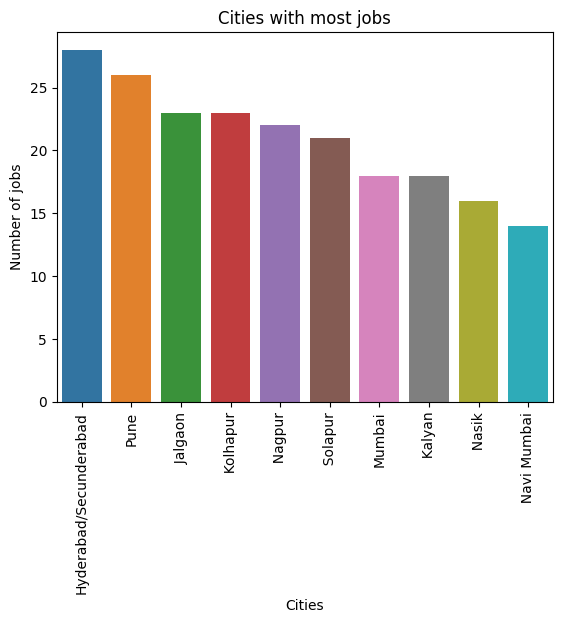

In [ ]:
city_count= cities_df['cities'].value_counts()
city_names= cities_df['cities'].unique()

ref_df1= pd.DataFrame({"city_count": city_count, 'city_names': city_names})
bar_plt_df1= ref_df1.head(10)

sns.barplot(x= bar_plt_df1.city_names, y= bar_plt_df1.city_count)
plt.xlabel('Cities')
plt.ylabel('Number of jobs')
plt.xticks(rotation=90)
plt.title('Cities with most jobs')
plt.show()

#### * Cities for which most vacancies are available are shown in the above chart